<a href="https://colab.research.google.com/github/bhargav23/CNN-Projects/blob/master/VGG/Fashion_Mnist_VGG13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
!git clone https://github.com/bhargav23/CNN-Projects

Cloning into 'CNN-Projects'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 133 (delta 69), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (133/133), 475.64 KiB | 5.11 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import sys
sys.path.append('/content/CNN-Projects/Libraries')

In [ ]:
import evadataloader
dataloader = evadataloader.DataLoader()


# Train Phase transformations
train_transforms = transforms.Compose([
                                        transforms.Resize((28, 28)),
                                        #transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                        transforms.Resize((28, 28)),
                                        #transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])



trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=train_transforms)
trainloader = dataloader.load(trainset)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=test_transforms)
testloader = dataloader.load(testset)

classes = ('T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot')

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


torch.Size([512, 1, 28, 28])
torch.Size([512])


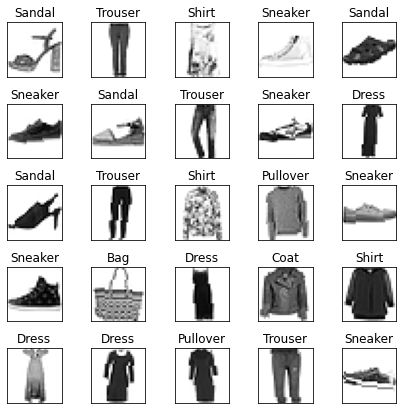

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
def show25(images, labels):
  r, c = 5, 5
  figmatrix = plt.figure(figsize=(7, 7))
  gs1 = gridspec.GridSpec(r, c)
  gs1.update(wspace=0.5, hspace=0.5) # set the 
  for i in range(1, r*c+1):
    plt.subplot(gs1[i-1])
    plt.tick_params( axis='both', which='both', labelbottom=False, labelleft=False, left=False, bottom=False)
    plt.imshow(images[i-1].numpy().squeeze(), cmap='gray_r')
    plt.title(classes[labels[i-1]])
  plt.show()

show25(images[:25], labels[:25])

In [ ]:
import vggnet
net = vggnet.VGG('VGG13')

In [ ]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = net.to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]             640
       BatchNorm2d-2           [-1, 64, 28, 28]             128
              ReLU-3           [-1, 64, 28, 28]               0
            Conv2d-4           [-1, 64, 28, 28]          36,928
       BatchNorm2d-5           [-1, 64, 28, 28]             128
              ReLU-6           [-1, 64, 28, 28]               0
         MaxPool2d-7           [-1, 64, 14, 14]               0
            Conv2d-8          [-1, 128, 14, 14]          73,856
       BatchNorm2d-9          [-1, 128, 14, 14]             256
             ReLU-10          [-1, 128, 14, 14]               0
           Conv2d-11          [-1, 128, 14, 14]         147,584
      BatchNorm2d-12          [-1, 128, 14, 14]             256
             ReLU-13          [-1, 128, 14, 14]               0
        MaxPool2d-14            [-

In [ ]:
import evascheduler

In [ ]:
from torch.optim.lr_scheduler import StepLR
from evascheduler import train,test

model =  net.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,criterion)
    scheduler.step()
    test(model, device, testloader)

EPOCH:

  0%|          | 0/118 [00:00<?, ?it/s]

 0


Loss=0.33102530241012573 Batch_id=117 Accuracy=83.33: 100%|██████████| 118/118 [01:03<00:00,  1.86it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1200, Accuracy: 8800/10000 (88.00%)

EPOCH: 1


Loss=0.23813514411449432 Batch_id=117 Accuracy=90.46: 100%|██████████| 118/118 [01:03<00:00,  1.86it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0988, Accuracy: 9012/10000 (90.12%)

EPOCH: 2


Loss=0.3421742022037506 Batch_id=117 Accuracy=91.86: 100%|██████████| 118/118 [01:03<00:00,  1.85it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0931, Accuracy: 9069/10000 (90.69%)

EPOCH: 3


Loss=0.1510857194662094 Batch_id=117 Accuracy=92.72: 100%|██████████| 118/118 [01:03<00:00,  1.86it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0914, Accuracy: 9086/10000 (90.86%)

EPOCH: 4


Loss=0.2110210806131363 Batch_id=117 Accuracy=93.80: 100%|██████████| 118/118 [01:03<00:00,  1.85it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0850, Accuracy: 9150/10000 (91.50%)

EPOCH: 5


Loss=0.04645390808582306 Batch_id=117 Accuracy=94.36: 100%|██████████| 118/118 [01:03<00:00,  1.86it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0788, Accuracy: 9212/10000 (92.12%)

EPOCH: 6


Loss=0.08645102381706238 Batch_id=117 Accuracy=96.27: 100%|██████████| 118/118 [01:03<00:00,  1.85it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0640, Accuracy: 9360/10000 (93.60%)

EPOCH: 7


Loss=0.07050833106040955 Batch_id=117 Accuracy=96.91: 100%|██████████| 118/118 [01:03<00:00,  1.86it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0631, Accuracy: 9369/10000 (93.69%)

EPOCH: 8


Loss=0.04569697007536888 Batch_id=117 Accuracy=97.14: 100%|██████████| 118/118 [01:03<00:00,  1.85it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0631, Accuracy: 9369/10000 (93.69%)

EPOCH: 9


Loss=0.08030865341424942 Batch_id=117 Accuracy=97.33: 100%|██████████| 118/118 [01:03<00:00,  1.86it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0638, Accuracy: 9362/10000 (93.62%)

EPOCH: 10


Loss=0.057842668145895004 Batch_id=117 Accuracy=97.49: 100%|██████████| 118/118 [01:03<00:00,  1.85it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0642, Accuracy: 9358/10000 (93.58%)

EPOCH: 11


Loss=0.10450199246406555 Batch_id=117 Accuracy=97.64: 100%|██████████| 118/118 [01:03<00:00,  1.86it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0628, Accuracy: 9372/10000 (93.72%)

EPOCH: 12


Loss=0.09324416518211365 Batch_id=117 Accuracy=97.94: 100%|██████████| 118/118 [01:03<00:00,  1.85it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0617, Accuracy: 9383/10000 (93.83%)

EPOCH: 13


Loss=0.040035512298345566 Batch_id=117 Accuracy=97.96: 100%|██████████| 118/118 [01:03<00:00,  1.86it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0623, Accuracy: 9377/10000 (93.77%)

EPOCH: 14


Loss=0.0489087738096714 Batch_id=117 Accuracy=97.97: 100%|██████████| 118/118 [01:04<00:00,  1.82it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0619, Accuracy: 9381/10000 (93.81%)

EPOCH: 15


Loss=0.0646604672074318 Batch_id=117 Accuracy=98.02: 100%|██████████| 118/118 [01:03<00:00,  1.85it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0627, Accuracy: 9373/10000 (93.73%)

EPOCH: 16


Loss=0.07104673236608505 Batch_id=117 Accuracy=98.10: 100%|██████████| 118/118 [01:04<00:00,  1.82it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0629, Accuracy: 9371/10000 (93.71%)

EPOCH: 17


Loss=0.06561822444200516 Batch_id=117 Accuracy=98.12: 100%|██████████| 118/118 [01:03<00:00,  1.84it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0624, Accuracy: 9376/10000 (93.76%)

EPOCH: 18


Loss=0.09119459241628647 Batch_id=117 Accuracy=98.08: 100%|██████████| 118/118 [01:04<00:00,  1.82it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0624, Accuracy: 9376/10000 (93.76%)

EPOCH: 19


Loss=0.05444633588194847 Batch_id=117 Accuracy=98.07: 100%|██████████| 118/118 [01:03<00:00,  1.86it/s]



Test set: Average loss: 0.0629, Accuracy: 9371/10000 (93.71%)



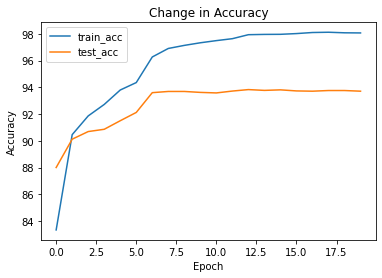

In [ ]:
from evascheduler import draw_graph
draw_graph()

In [ ]:
from evascheduler import get_misclassified
misclassified = get_misclassified()

In [ ]:
def plot_images(img_data,classes,img_name):
  figure = plt.figure(figsize=(10, 10))
  
  num_of_images = len(img_data)
  for index in range(1, num_of_images + 1):
      img = img_data[index-1][0][0]
      plt.subplot(5, 5, index)
      plt.axis('off')
      plt.imshow(img.cpu().numpy(),cmap='gray_r')
      plt.title("Actual: %s\nPredicted: %s" % (classes[img_data[index-1][1]], classes[img_data[index-1][2]]))
  
  plt.tight_layout()
  plt.savefig(img_name)


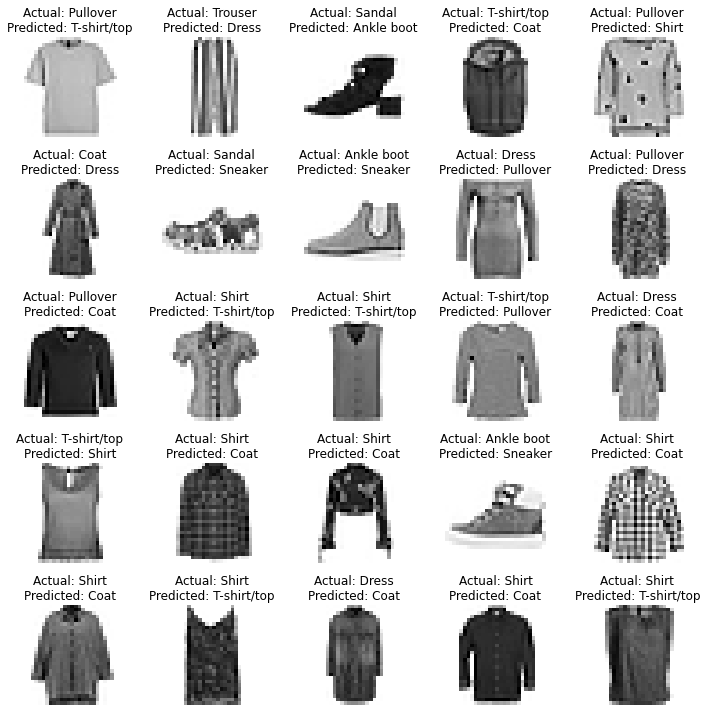

In [ ]:
#import utils
#from utils import plot_images
plot_images(misclassified,classes,"misclassified.png")